## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  87.562170   847.487081  0.665140  9.408876  1.511503
1   0.422612  1350.174660  0.471840  3.652408  1.647233
2  12.488567   395.779954  0.817980  7.151757  1.476769
3  12.657159  1609.383618  0.558364  6.023822  1.495302
4  95.469026  1677.153485  0.672266  4.493430  1.323985


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9995027	total: 64.9ms	remaining: 1m 4s
1:	learn: 0.9880920	total: 65.9ms	remaining: 32.9s
2:	learn: 0.9769920	total: 66.9ms	remaining: 22.2s
3:	learn: 0.9657122	total: 68.1ms	remaining: 16.9s
4:	learn: 0.9555457	total: 68.8ms	remaining: 13.7s
5:	learn: 0.9467019	total: 69.6ms	remaining: 11.5s
6:	learn: 0.9352032	total: 70.3ms	remaining: 9.97s
7:	learn: 0.9240469	total: 71.2ms	remaining: 8.82s
8:	learn: 0.9146478	total: 72ms	remaining: 7.93s
9:	learn: 0.9045403	total: 72.8ms	remaining: 7.21s
10:	learn: 0.8950709	total: 73.6ms	remaining: 6.62s
11:	learn: 0.8848013	total: 74.2ms	remaining: 6.11s
12:	learn: 0.8760634	total: 74.8ms	remaining: 5.67s
13:	learn: 0.8645446	total: 75.3ms	remaining: 5.3s
14:	learn: 0.8547368	total: 76.3ms	remaining: 5.01s
15:	learn: 0.8460386	total: 76.8ms	remaining: 4.72s
16:	learn: 0.8365750	total: 77.3ms	remaining: 4.47s
17:	learn: 0.8271627	total: 78.7ms	remaining: 4.29s
18:	learn: 0.8191259	total: 79.3ms	remaining: 4

20:	learn: 0.8001709	total: 80.4ms	remaining: 3.75s
21:	learn: 0.7903367	total: 80.9ms	remaining: 3.6s
22:	learn: 0.7814911	total: 81.5ms	remaining: 3.46s
23:	learn: 0.7720987	total: 82ms	remaining: 3.33s
24:	learn: 0.7644169	total: 82.4ms	remaining: 3.21s
25:	learn: 0.7569773	total: 83ms	remaining: 3.11s
26:	learn: 0.7494244	total: 83.5ms	remaining: 3.01s
27:	learn: 0.7399728	total: 84ms	remaining: 2.92s
28:	learn: 0.7317518	total: 86.2ms	remaining: 2.89s
29:	learn: 0.7232065	total: 87ms	remaining: 2.81s
30:	learn: 0.7174105	total: 87.5ms	remaining: 2.74s
31:	learn: 0.7092803	total: 88.1ms	remaining: 2.67s
32:	learn: 0.7025076	total: 88.7ms	remaining: 2.6s
33:	learn: 0.6972561	total: 89.2ms	remaining: 2.54s
34:	learn: 0.6894725	total: 89.7ms	remaining: 2.47s
35:	learn: 0.6826043	total: 90.2ms	remaining: 2.42s
36:	learn: 0.6747908	total: 91ms	remaining: 2.37s
37:	learn: 0.6677608	total: 91.6ms	remaining: 2.32s
38:	learn: 0.6625332	total: 92.2ms	remaining: 2.27s
39:	learn: 0.6548328	tot

206:	learn: 0.1983698	total: 165ms	remaining: 633ms
207:	learn: 0.1970183	total: 166ms	remaining: 631ms
208:	learn: 0.1956284	total: 166ms	remaining: 629ms
209:	learn: 0.1945299	total: 167ms	remaining: 627ms
210:	learn: 0.1939104	total: 167ms	remaining: 624ms
211:	learn: 0.1929054	total: 168ms	remaining: 623ms
212:	learn: 0.1921814	total: 168ms	remaining: 621ms
213:	learn: 0.1913255	total: 168ms	remaining: 619ms
214:	learn: 0.1906807	total: 169ms	remaining: 617ms
215:	learn: 0.1895119	total: 169ms	remaining: 614ms
216:	learn: 0.1884702	total: 170ms	remaining: 613ms
217:	learn: 0.1874823	total: 170ms	remaining: 611ms
218:	learn: 0.1866840	total: 171ms	remaining: 608ms
219:	learn: 0.1857076	total: 171ms	remaining: 606ms
220:	learn: 0.1847288	total: 172ms	remaining: 605ms
221:	learn: 0.1837762	total: 172ms	remaining: 603ms
222:	learn: 0.1827107	total: 172ms	remaining: 600ms
223:	learn: 0.1819234	total: 173ms	remaining: 599ms
224:	learn: 0.1808908	total: 173ms	remaining: 597ms
225:	learn: 

390:	learn: 0.0942354	total: 241ms	remaining: 376ms
391:	learn: 0.0938926	total: 242ms	remaining: 375ms
392:	learn: 0.0936096	total: 242ms	remaining: 374ms
393:	learn: 0.0934268	total: 243ms	remaining: 373ms
394:	learn: 0.0930227	total: 243ms	remaining: 372ms
395:	learn: 0.0929349	total: 243ms	remaining: 371ms
396:	learn: 0.0925503	total: 244ms	remaining: 371ms
397:	learn: 0.0922769	total: 244ms	remaining: 370ms
398:	learn: 0.0919744	total: 245ms	remaining: 369ms
399:	learn: 0.0918473	total: 245ms	remaining: 368ms
400:	learn: 0.0915861	total: 246ms	remaining: 367ms
401:	learn: 0.0913216	total: 246ms	remaining: 366ms
402:	learn: 0.0911678	total: 246ms	remaining: 365ms
403:	learn: 0.0908345	total: 247ms	remaining: 364ms
404:	learn: 0.0905814	total: 247ms	remaining: 364ms
405:	learn: 0.0904110	total: 248ms	remaining: 363ms
406:	learn: 0.0901647	total: 248ms	remaining: 362ms
407:	learn: 0.0899089	total: 249ms	remaining: 361ms
408:	learn: 0.0896335	total: 249ms	remaining: 360ms
409:	learn: 

576:	learn: 0.0556651	total: 327ms	remaining: 240ms
577:	learn: 0.0555315	total: 327ms	remaining: 239ms
578:	learn: 0.0554214	total: 328ms	remaining: 238ms
579:	learn: 0.0551737	total: 328ms	remaining: 238ms
580:	learn: 0.0550606	total: 329ms	remaining: 237ms
581:	learn: 0.0547433	total: 329ms	remaining: 236ms
582:	learn: 0.0545712	total: 329ms	remaining: 236ms
583:	learn: 0.0544771	total: 330ms	remaining: 235ms
584:	learn: 0.0542253	total: 330ms	remaining: 234ms
585:	learn: 0.0540659	total: 331ms	remaining: 234ms
586:	learn: 0.0539739	total: 331ms	remaining: 233ms
587:	learn: 0.0538367	total: 331ms	remaining: 232ms
588:	learn: 0.0537292	total: 332ms	remaining: 232ms
589:	learn: 0.0535234	total: 332ms	remaining: 231ms
590:	learn: 0.0534192	total: 333ms	remaining: 230ms
591:	learn: 0.0532161	total: 333ms	remaining: 230ms
592:	learn: 0.0529165	total: 333ms	remaining: 229ms
593:	learn: 0.0526977	total: 334ms	remaining: 228ms
594:	learn: 0.0525764	total: 334ms	remaining: 228ms
595:	learn: 

759:	learn: 0.0314965	total: 402ms	remaining: 127ms
760:	learn: 0.0314180	total: 403ms	remaining: 127ms
761:	learn: 0.0313411	total: 404ms	remaining: 126ms
762:	learn: 0.0312616	total: 404ms	remaining: 125ms
763:	learn: 0.0311175	total: 404ms	remaining: 125ms
764:	learn: 0.0310399	total: 405ms	remaining: 124ms
765:	learn: 0.0309093	total: 405ms	remaining: 124ms
766:	learn: 0.0308218	total: 406ms	remaining: 123ms
767:	learn: 0.0307360	total: 406ms	remaining: 123ms
768:	learn: 0.0306177	total: 406ms	remaining: 122ms
769:	learn: 0.0305445	total: 407ms	remaining: 122ms
770:	learn: 0.0304727	total: 407ms	remaining: 121ms
771:	learn: 0.0304108	total: 408ms	remaining: 120ms
772:	learn: 0.0303270	total: 408ms	remaining: 120ms
773:	learn: 0.0302413	total: 408ms	remaining: 119ms
774:	learn: 0.0301016	total: 409ms	remaining: 119ms
775:	learn: 0.0300214	total: 409ms	remaining: 118ms
776:	learn: 0.0299429	total: 410ms	remaining: 118ms
777:	learn: 0.0298622	total: 410ms	remaining: 117ms
778:	learn: 

966:	learn: 0.0188210	total: 488ms	remaining: 16.7ms
967:	learn: 0.0187767	total: 490ms	remaining: 16.2ms
968:	learn: 0.0187561	total: 490ms	remaining: 15.7ms
969:	learn: 0.0187130	total: 491ms	remaining: 15.2ms
970:	learn: 0.0186928	total: 491ms	remaining: 14.7ms
971:	learn: 0.0186672	total: 492ms	remaining: 14.2ms
972:	learn: 0.0186459	total: 492ms	remaining: 13.7ms
973:	learn: 0.0186142	total: 493ms	remaining: 13.1ms
974:	learn: 0.0185892	total: 493ms	remaining: 12.6ms
975:	learn: 0.0185643	total: 493ms	remaining: 12.1ms
976:	learn: 0.0185048	total: 494ms	remaining: 11.6ms
977:	learn: 0.0184369	total: 494ms	remaining: 11.1ms
978:	learn: 0.0184036	total: 495ms	remaining: 10.6ms
979:	learn: 0.0183839	total: 495ms	remaining: 10.1ms
980:	learn: 0.0183513	total: 495ms	remaining: 9.6ms
981:	learn: 0.0183358	total: 496ms	remaining: 9.09ms
982:	learn: 0.0183120	total: 496ms	remaining: 8.58ms
983:	learn: 0.0182885	total: 497ms	remaining: 8.08ms
984:	learn: 0.0182312	total: 497ms	remaining: 7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.56775559030595


ABC Pre-generator MAE 0.6133475692588828


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

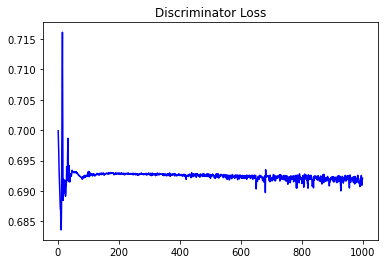

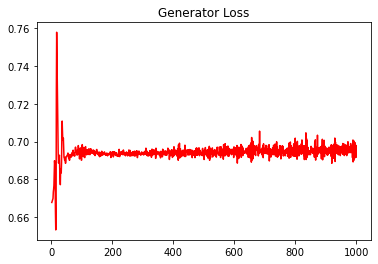

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.5375218944232911


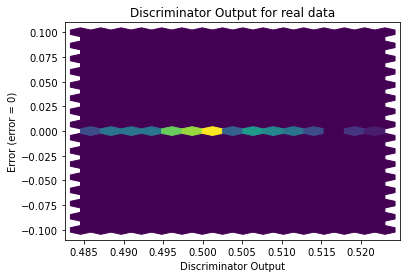

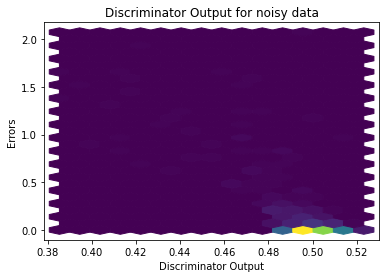

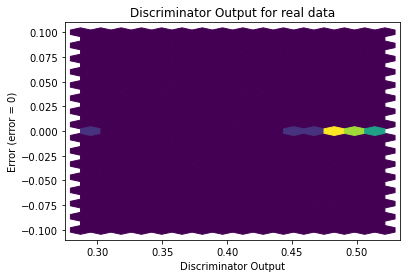

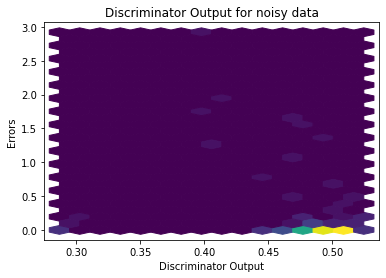

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

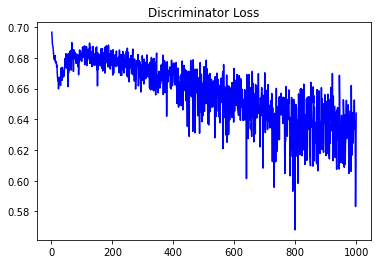

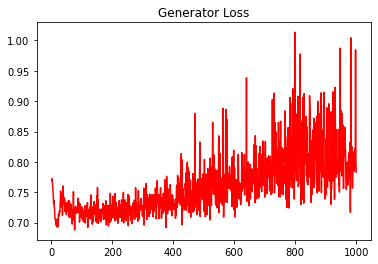

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5739654383063316


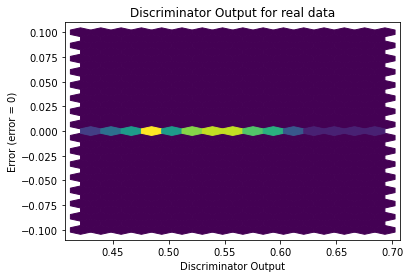

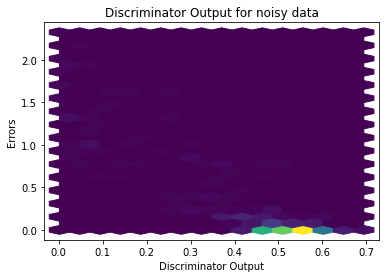

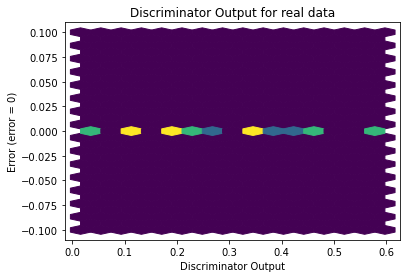

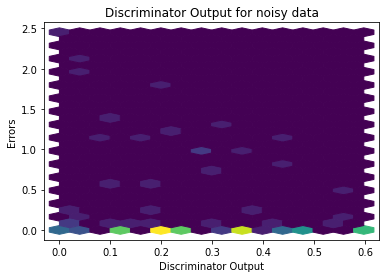

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


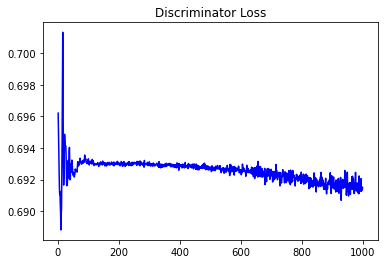

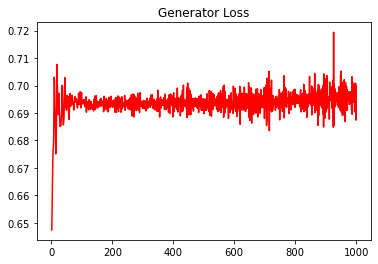

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.5586490851459094


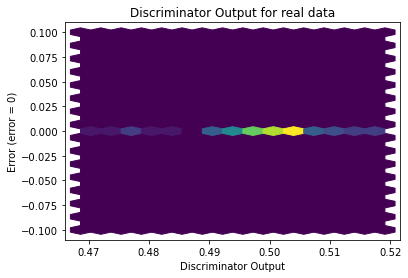

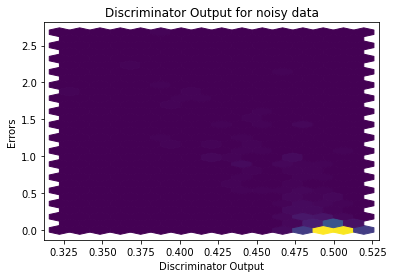

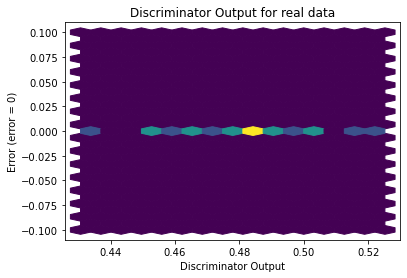

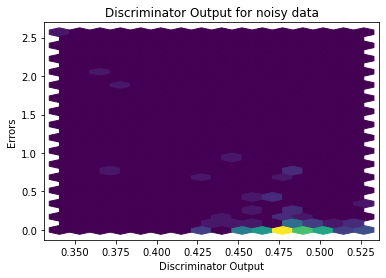

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


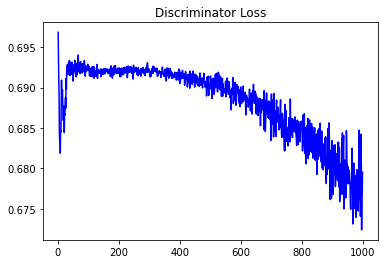

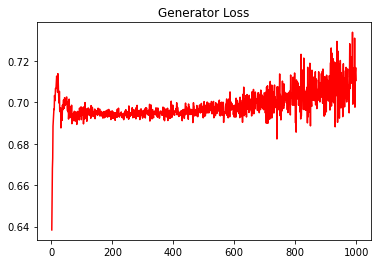

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5591663736980409


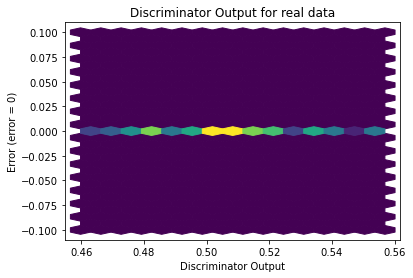

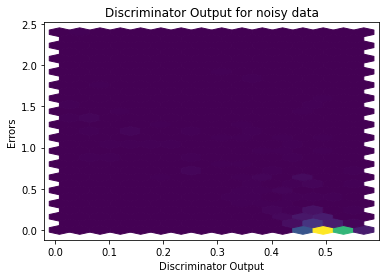

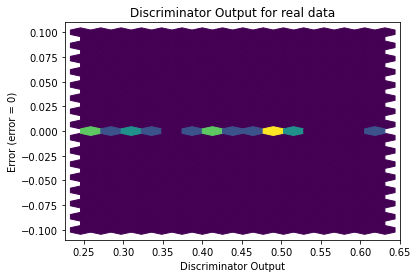

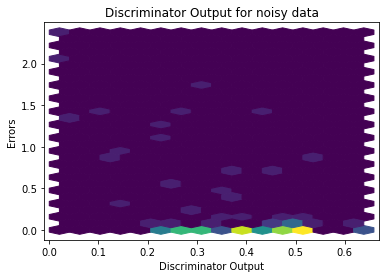

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4327]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0495]], requires_grad=True)
